# Explore here

In [2]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.to_csv('../data/raw/df.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.duplicated().sum()
print(df['id'].duplicated().sum())

0


In [5]:
#eliminar información irrelevante
columnas_eliminar = ['last_review','reviews_per_month','id','name','host_name']
df.drop(columnas_eliminar,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


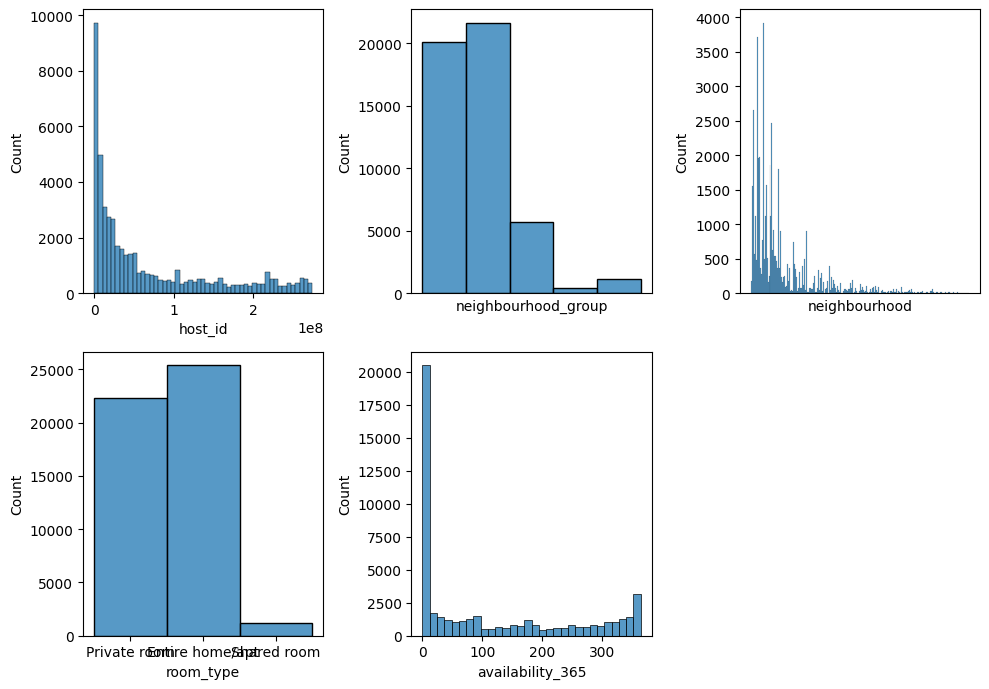

In [8]:
#analisis univariable
#analisis de las variables categóricas: 'host_id','neighbourhood_group','neighbourhood','room_type','availability_365'


import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2,3,figsize=(10,7))
#histogramas de las variables
sns.histplot(ax= axis[0,0],data=df,x='host_id')
sns.histplot(ax= axis[0,1],data=df,x='neighbourhood_group').set_xticks([])
sns.histplot(ax= axis[0,2],data=df,x='neighbourhood').set_xticks([])
sns.histplot(ax= axis[1,0],data=df,x='room_type')
sns.histplot(ax= axis[1,1],data=df,x='availability_365')

#para borrar graficos en blanco
fig.delaxes(axis[1,2])

plt.tight_layout()
plt.show()





(0.0, 100.0)

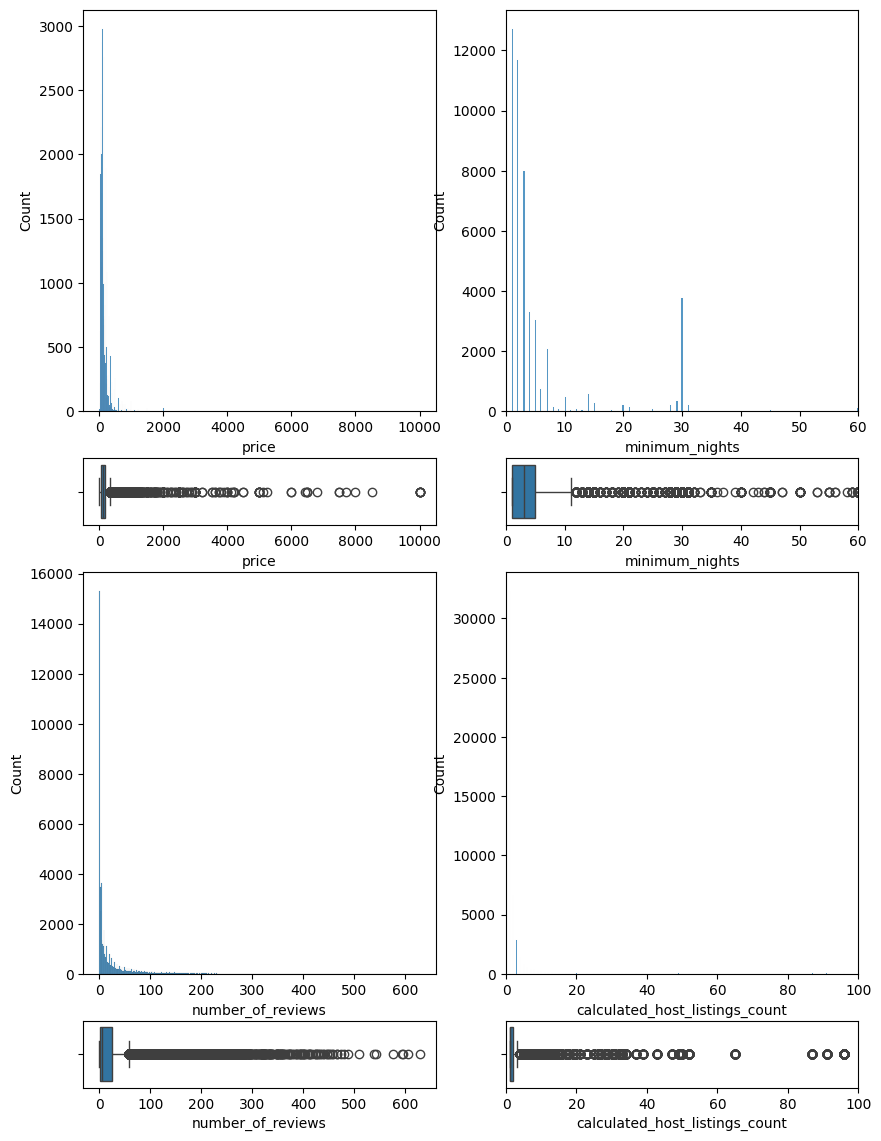

In [20]:
#variables numéricas: 'latitude','longitude','price','minimum_nights','number_of_reviews','calculated_host_listing_count','availability_365'
fig, axis = plt.subplots(4,2,figsize=(10,14),gridspec_kw={"height_ratios":[6,1,6,1]})

sns.histplot(ax= axis[0,0],data=df,x='price')
sns.boxplot(ax=axis[1,0],data=df,x='price')
sns.histplot(ax= axis[0,1],data=df,x='minimum_nights').set_xlim(0,60)
sns.boxplot(ax=axis[1,1],data=df,x='minimum_nights').set_xlim(0,60)
sns.histplot(ax= axis[2,0],data=df,x='number_of_reviews')
sns.boxplot(ax=axis[3,0],data=df,x='number_of_reviews')
sns.histplot(ax= axis[2,1],data=df,x='calculated_host_listings_count').set_xlim(0,100)
sns.boxplot(ax=axis[3,1],data=df,x='calculated_host_listings_count').set_xlim(0,100)